In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import zipfile
import os

# Upload your dataset ZIP file
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

# Create a directory to extract
extract_dir = "helmet_dataset"
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to '{extract_dir}'")

Saving archive.zip to archive.zip
Dataset extracted to 'helmet_dataset'


In [ ]:
!ls helmet_dataset


annotations  images


In [ ]:
# If 'images' or 'annotations' subfolders exist, list their contents
!ls helmet_dataset/images 2>/dev/null | head -10
!ls helmet_dataset/annotations 2>/dev/null | head -10

BikesHelmets0.png
BikesHelmets100.png
BikesHelmets101.png
BikesHelmets102.png
BikesHelmets103.png
BikesHelmets104.png
BikesHelmets105.png
BikesHelmets106.png
BikesHelmets107.png
BikesHelmets108.png
BikesHelmets0.xml
BikesHelmets100.xml
BikesHelmets101.xml
BikesHelmets102.xml
BikesHelmets103.xml
BikesHelmets104.xml
BikesHelmets105.xml
BikesHelmets106.xml
BikesHelmets107.xml
BikesHelmets108.xml


In [ ]:
!pip install split-folders
import splitfolders
#80% training, 20% validation.
splitfolders.ratio("helmet_dataset", output="helmet_data_split", seed=42, ratio=(0.8, 0.2))


Copying files: 1528 files [00:02, 595.21 files/s]


In [ ]:
#file handling
import os
import shutil
import xml.etree.ElementTree as ET #read .xml annotation files

# Define paths
images_dir = "helmet_dataset/images"
annotations_dir = "helmet_dataset/annotations"
output_dir = "helmet_data_split/train"

os.makedirs(output_dir, exist_ok=True)

# Loop through annotation files
for xml_file in os.listdir(annotations_dir):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(annotations_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    filename = root.find('filename').text
    obj = root.find('object')
    if obj is None:
        print(f"No object in {xml_file}, skipping.")
        continue

    class_name = obj.find('name').text
    class_folder = os.path.join(output_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)

    src_image_path = os.path.join(images_dir, filename)
    dst_image_path = os.path.join(class_folder, filename)

    if os.path.exists(src_image_path):
        shutil.copyfile(src_image_path, dst_image_path)
        print(f"Copied {filename} to {class_folder}")
    else:
        print(f"Image {filename} not found.")


Copied BikesHelmets95.png to helmet_data_split/train/With Helmet
Copied BikesHelmets465.png to helmet_data_split/train/With Helmet
Copied BikesHelmets426.png to helmet_data_split/train/With Helmet
Copied BikesHelmets487.png to helmet_data_split/train/Without Helmet
Copied BikesHelmets7.png to helmet_data_split/train/With Helmet
Copied BikesHelmets394.png to helmet_data_split/train/Without Helmet
Copied BikesHelmets456.png to helmet_data_split/train/With Helmet
Copied BikesHelmets509.png to helmet_data_split/train/With Helmet
Copied BikesHelmets52.png to helmet_data_split/train/Without Helmet
Copied BikesHelmets601.png to helmet_data_split/train/With Helmet
Copied BikesHelmets690.png to helmet_data_split/train/Without Helmet
Copied BikesHelmets294.png to helmet_data_split/train/With Helmet
Copied BikesHelmets327.png to helmet_data_split/train/With Helmet
Copied BikesHelmets548.png to helmet_data_split/train/With Helmet
Copied BikesHelmets185.png to helmet_data_split/train/With Helmet
Co

In [ ]:
import os
import shutil
import random

train_dir = "helmet_data_split/train"
val_dir = "helmet_data_split/val"
val_split = 0.2  # 20% for validation

os.makedirs(val_dir, exist_ok=True)

for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)
    os.makedirs(class_val_path, exist_ok=True)

    images = os.listdir(class_train_path)
    random.shuffle(images)

    val_count = int(len(images) * val_split)
    val_images = images[:val_count]

    for img in val_images:
        src = os.path.join(class_train_path, img)
        dst = os.path.join(class_val_path, img)
        shutil.move(src, dst)
        print(f"Moved {img} to {class_val_path}")


Moved BikesHelmets519.png to helmet_data_split/val/With Helmet
Moved BikesHelmets89.png to helmet_data_split/val/With Helmet
Moved BikesHelmets699.png to helmet_data_split/val/With Helmet
Moved BikesHelmets17.png to helmet_data_split/val/With Helmet
Moved BikesHelmets467.png to helmet_data_split/val/With Helmet
Moved BikesHelmets364.png to helmet_data_split/val/With Helmet
Moved BikesHelmets533.png to helmet_data_split/val/With Helmet
Moved BikesHelmets2.png to helmet_data_split/val/With Helmet
Moved BikesHelmets756.png to helmet_data_split/val/With Helmet
Moved BikesHelmets755.png to helmet_data_split/val/With Helmet
Moved BikesHelmets731.png to helmet_data_split/val/With Helmet
Moved BikesHelmets619.png to helmet_data_split/val/With Helmet
Moved BikesHelmets75.png to helmet_data_split/val/With Helmet
Moved BikesHelmets361.png to helmet_data_split/val/With Helmet
Moved BikesHelmets199.png to helmet_data_split/val/With Helmet
Moved BikesHelmets67.png to helmet_data_split/val/With Helme

In [ ]:
import shutil

# Folders to remove
unwanted = ['annotations', 'images', 'helmet-detection-yolov8-main']

for folder in unwanted:
    train_path = f'helmet_data_split/train/{folder}'
    val_path = f'helmet_data_split/val/{folder}'
    shutil.rmtree(train_path, ignore_errors=True)
    shutil.rmtree(val_path, ignore_errors=True)

print("Removed unwanted folders.")


Removed unwanted folders.


In [ ]:
import shutil

unwanted = ['annotations', 'images', 'helmet-detection-yolov8-main']
for folder in unwanted:
    shutil.rmtree(f"helmet_data_split/train/{folder}", ignore_errors=True)
    shutil.rmtree(f"helmet_data_split/val/{folder}", ignore_errors=True)


In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False, #ignoring model's original final dense layer
                         weights='imagenet')

base_model.trainable = True  # Unfreeze entire model

for layer in base_model.layers[:100]:
    layer.trainable = False #fine tuning

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Paths
train_dir = "helmet_data_split/train"
val_dir = "helmet_data_split/val"

# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'

)
val_data = val_gen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'

)

# MobileNetV2 base
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)


Found 610 images belonging to 2 classes.
Found 151 images belonging to 2 classes.
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.6182 - loss: 0.9509 - val_accuracy: 0.7550 - val_loss: 0.5092
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7453 - loss: 0.5192 - val_accuracy: 0.7748 - val_loss: 0.4956
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7086 - loss: 0.5196 - val_accuracy: 0.7417 - val_loss: 0.4686
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7592 - loss: 0.4612 - val_accuracy: 0.7748 - val_loss: 0.4784
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7773 - loss: 0.4475 - val_accuracy: 0.7881 - val_loss: 0.4588
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.7737 - loss: 0.4351 - val_accuracy: 0.7020 - val_loss: 0.5287
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7392 - loss: 0.4985 - val_accuracy: 0.7417 - val_loss: 0.5120
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━

In [ ]:
print(train_data.class_indices)


{'With Helmet': 0, 'Without Helmet': 1}


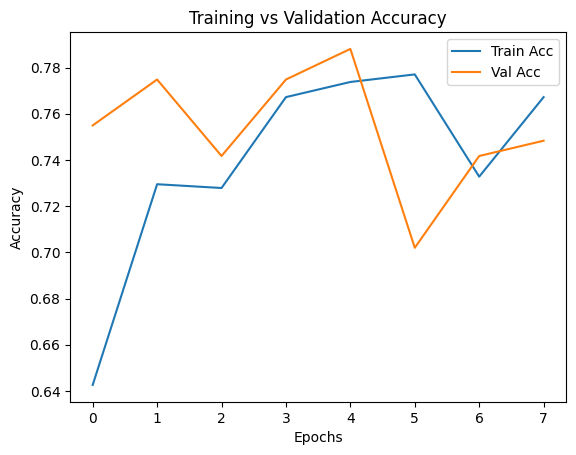

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predicted probabilities
val_generator.reset()
pred_probs = model.predict(val_generator)
y_pred = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

y_true = val_generator.classes            # True class labels
class_names = list(val_generator.class_indices.keys())  # Get class names

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optional: Classification report
print(classification_report(y_true, y_pred, target_names=class_names))


NameError: name 'val_generator' is not defined

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


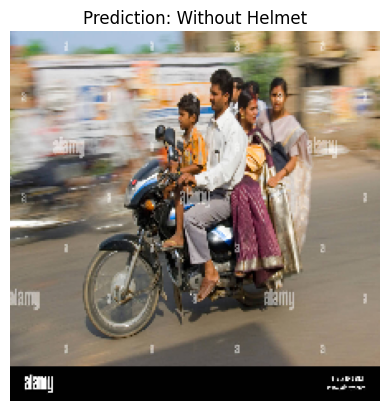

In [ ]:
# Load and preprocess image
img_path = '/content/p5 NH.jpg'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


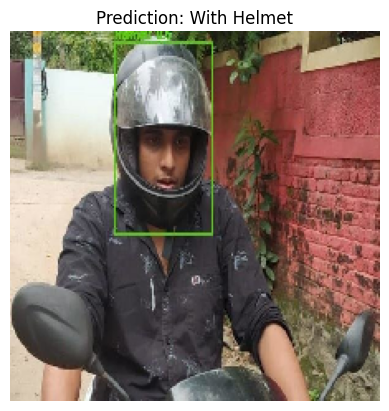

In [ ]:
# Load and preprocess image
img_path = '/content/Detection-of-rider-wearing-helmet.png'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


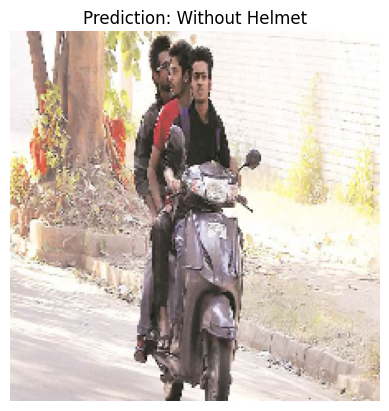

In [ ]:
# Load and preprocess image
img_path = '/content/no bike helmet.jpg'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


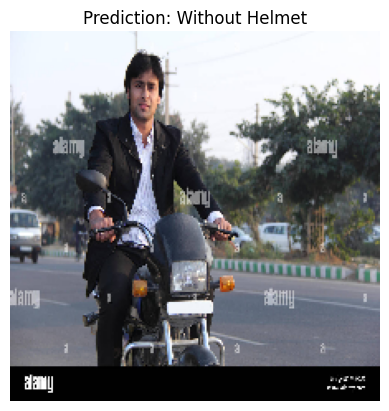

In [ ]:
# Load and preprocess image
img_path = '/content/p3 NH.jpg'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


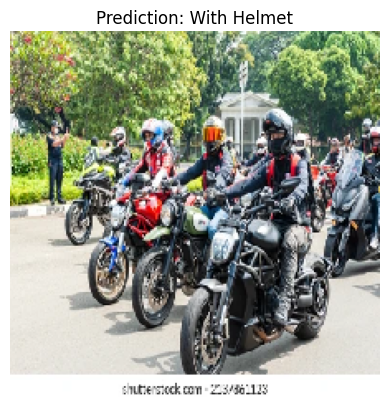

In [ ]:
# Load and preprocess image
img_path = '/content/p1 H.webp'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


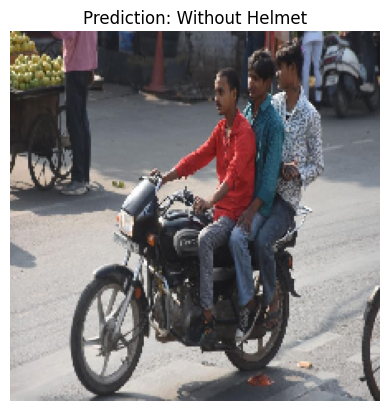

In [ ]:
# Load and preprocess image
img_path = '/content/p4 NH'  # Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()
